In [49]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
import cv2
import imghdr
from PIL import Image

In [50]:
data_dir = 'dataset'

In [51]:
data=[]
labels=[]

In [52]:
classes = os.listdir(data_dir)
for class_label in classes:
    class_path = os.path.join(data_dir, class_label)
    image_files = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(".jpg") or img.endswith(".jpeg")]
    for image_file in image_files:
        img=cv2.imread(image_file)
        img=cv2.resize(img,(32,32))
        data.append(img)
        labels.append(class_label)

In [53]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [54]:
x_train=np.array(train_data)
x_test=np.array(test_data)
y_train=np.array(train_labels,dtype='uint8')
y_test=np.array(test_labels,dtype='uint8')
print(x_train.shape)
x_test.shape

(1019, 32, 32, 3)


(255, 32, 32, 3)

In [55]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]
y_test[:5]

array([0, 1, 0, 2, 1], dtype=uint8)

In [56]:
lclasses = ["Animals","Humans","Plants","Non-Liv"]

In [57]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index],cmap='gray')
    plt.xlabel(lclasses[y[index]])
    

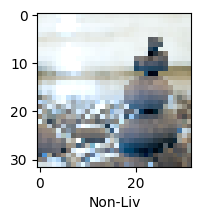

In [58]:
plot_sample(x_train, y_train, 1018)

In [59]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [60]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



ann_history = ann.fit(x_train, y_train, batch_size= 32,epochs=20)

Epoch 1/20


32/32 [==============================] - 1s 37ms/step - loss: 1.5915 - accuracy: 0.3013
Epoch 2/20
32/32 [==============================] - 1s 37ms/step - loss: 1.3229 - accuracy: 0.4024
Epoch 3/20
32/32 [==============================] - 1s 38ms/step - loss: 1.2241 - accuracy: 0.4799
Epoch 4/20
32/32 [==============================] - 1s 42ms/step - loss: 1.1545 - accuracy: 0.5358
Epoch 5/20
32/32 [==============================] - 1s 41ms/step - loss: 1.1163 - accuracy: 0.5397
Epoch 6/20
32/32 [==============================] - 1s 42ms/step - loss: 1.1087 - accuracy: 0.5633
Epoch 7/20
32/32 [==============================] - 1s 40ms/step - loss: 0.9999 - accuracy: 0.6232
Epoch 8/20
32/32 [==============================] - 1s 42ms/step - loss: 0.9531 - accuracy: 0.6369
Epoch 9/20
32/32 [==============================] - 1s 40ms/step - loss: 0.9665 - accuracy: 0.6212
Epoch 10/20
32/32 [==============================] - 1s 39ms/step - loss: 1.0133 - accuracy: 0.6006
Epoch 11/20
32/32 [=

In [61]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

cnn = keras.Sequential()

cnn.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (2, 2), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(128, activation='relu'))

cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [62]:
cnn_hist = cnn.fit(x_train, y_train, epochs=20 )

Epoch 1/20
32/32 [==============================] - 1s 11ms/step - loss: 1.4351 - accuracy: 0.3003
Epoch 2/20
32/32 [==============================] - 0s 12ms/step - loss: 1.1099 - accuracy: 0.5358
Epoch 3/20
32/32 [==============================] - 0s 12ms/step - loss: 0.9432 - accuracy: 0.6281
Epoch 4/20
32/32 [==============================] - 0s 13ms/step - loss: 0.8618 - accuracy: 0.6811
Epoch 5/20
32/32 [==============================] - 0s 12ms/step - loss: 0.7673 - accuracy: 0.7488
Epoch 6/20
32/32 [==============================] - 0s 14ms/step - loss: 0.7211 - accuracy: 0.7507
Epoch 7/20
32/32 [==============================] - 0s 12ms/step - loss: 0.6804 - accuracy: 0.7498
Epoch 8/20
32/32 [==============================] - 0s 12ms/step - loss: 0.6410 - accuracy: 0.7684
Epoch 9/20
32/32 [==============================] - 0s 12ms/step - loss: 0.5659 - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 11ms/step - loss: 0.5512 - accuracy: 0.8204
Epoch 11/

In [63]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(x_test, y_test)
print(cnn_test_accuracy*100, "%")

8/8 [==============================] - 0s 4ms/step - loss: 0.9164 - accuracy: 0.7020
70.1960802078247 %


In [64]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test)

print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

8/8 [==============================] - 0s 9ms/step - loss: 1.1592 - accuracy: 0.5333
Test Loss :  1.1591546535491943
Test Accuracy :  0.5333333611488342


Test Loss: 1.1591546535491943
Test Accuracy: 53.33333611488342 %


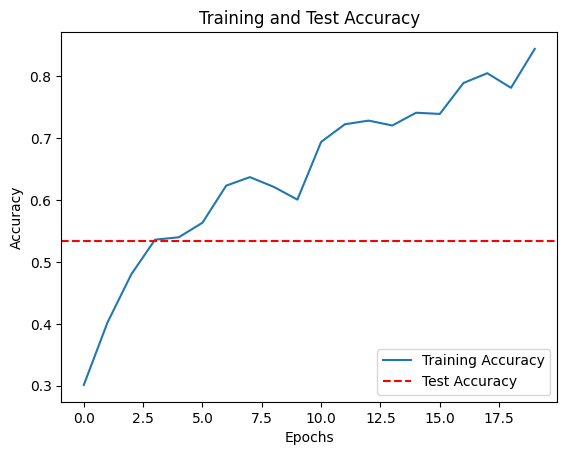

In [65]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy*100, "%")

plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.show()

0.9509322643280029


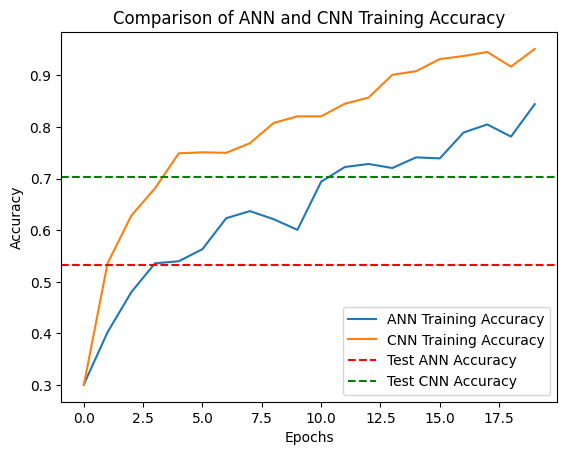

In [66]:
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(cnn_hist.history['accuracy'], label='CNN Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test ANN Accuracy')
plt.axhline(y=cnn_test_accuracy, color='g', linestyle='--', label='Test CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Comparison of ANN and CNN Training Accuracy')

print(max(cnn_hist.history['accuracy']))
plt.show()

In [67]:
# model_5_epochs = ann.fit(x_train, y_train, epochs=5)
# print("Trained for 5 epochs")
# model_20_epochs = ann.fit(x_train, y_train, epochs=20)
# print("Trained for 20 epochs")
# plt.plot(model_5_epochs.history['accuracy'], label='5 Epochs')
# plt.plot(model_20_epochs.history['accuracy'], label='20 Epochs')

# plt.title('Model Accuracy Comparison')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

# max_acc_5_epochs = max(model_5_epochs.history['accuracy'])
# max_acc_20_epochs = max(model_20_epochs.history['accuracy'])
# print("Maximum accuracy for 5 epochs : ", max_acc_5_epochs*100, " %")
# print("Maximum accuracy for 20 epochs : ", max_acc_20_epochs*100, " %")


Manual Testing

In [68]:
y_pred = cnn.predict(x_test)
y_pred[:5]


8/8 [==============================] - 0s 4ms/step


array([[9.97952223e-01, 9.94645641e-04, 6.61845494e-04, 3.91248381e-04,
        1.01510973e-10, 8.53531246e-10, 8.51945459e-10, 1.16006586e-10,
        2.01838643e-10, 5.17304033e-10],
       [5.12594590e-04, 9.96845245e-01, 7.31117034e-04, 1.90976728e-03,
        1.86159610e-07, 1.10085537e-07, 2.77513550e-07, 5.16455088e-07,
        1.10597156e-07, 9.99116381e-08],
       [3.10215324e-01, 2.29107067e-02, 6.66623890e-01, 2.49792705e-04,
        8.58917026e-09, 5.32925561e-08, 8.85414551e-08, 2.09447943e-08,
        3.98630000e-08, 2.98068485e-08],
       [5.48858225e-01, 1.16500640e-02, 4.39231664e-01, 2.58423563e-04,
        9.35861095e-08, 2.81665478e-07, 4.55647694e-07, 2.82113859e-07,
        3.70041022e-07, 1.79867129e-07],
       [3.29637751e-02, 9.56846237e-01, 7.48741580e-03, 2.57391320e-03,
        1.64054654e-05, 2.53468879e-05, 2.65022773e-05, 3.50875198e-05,
        1.11615209e-05, 1.41898145e-05]], dtype=float32)

In [69]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 1, 2, 0, 1]

In [70]:
y_test[:5]

array([0, 1, 0, 2, 1], dtype=uint8)

0


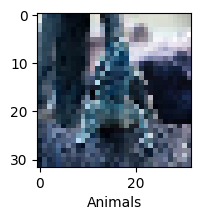

In [75]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

In [72]:
classes[y_classes[3]]

'0'

0


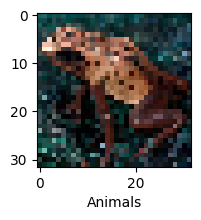

In [76]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

3


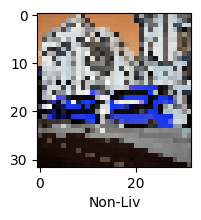

In [77]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

1


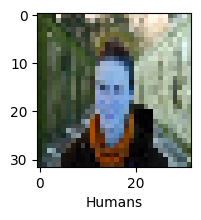

In [78]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

0


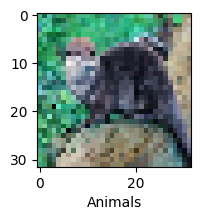

In [79]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)